<a href="https://colab.research.google.com/github/iamvssrao/FastAI/blob/main/Golden_ratio_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivasubbaraovangara","key":"1ba5a8a481af78a0d407b8e5c75b9004"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/ && chmod 660 ~/.kaggle/kaggle.json

mv: cannot move 'kaggle.json' to '/root/.kaggle/': Not a directory


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/ && chmod 660 ~/.kaggle/kaggle.json

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/celeba-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.33G/1.33G [00:15<00:00, 90.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2


In [16]:
!cp -r /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2 /content

In [23]:
pwd


'/content/sample_data'

In [24]:
ls ..


2/  sample_data/


In [25]:
ls

anscombe.json*               california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv                README.md*


In [26]:
ls ..


2/  sample_data/


In [28]:
cd 2

[Errno 2] No such file or directory: '2'
/content/sample_data


In [ ]:
import pandas as pd
df = pd.read_csv('/content/jessicali9530/celeba-dataset/versions/2/list_attr_celeba.csv')
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
ldf = pd.read_csv('/content/jessicali9530/celeba-dataset/versions/2/list_landmarks_align_celeba.csv')
ldf.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


In [ ]:
import numpy as np

# Load CSV (Replace 'your_file.csv' with actual file path)
# df = pd.read_csv("your_file.csv")

# Function to calculate Euclidean distance
def distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# List to store golden ratio results
golden_ratios = []

for _, row in ldf.iterrows():
    # Extract coordinates
    lefteye_x, lefteye_y = row["lefteye_x"], row["lefteye_y"]
    righteye_x, righteye_y = row["righteye_x"], row["righteye_y"]
    nose_x, nose_y = row["nose_x"], row["nose_y"]
    leftmouth_x, leftmouth_y = row["leftmouth_x"], row["leftmouth_y"]
    rightmouth_x, rightmouth_y = row["rightmouth_y"], row["rightmouth_y"]

    # Calculate facial distances
    eye_width = distance(lefteye_x, lefteye_y, righteye_x, righteye_y)
    upper_face_height = distance(nose_x, nose_y, (lefteye_x + righteye_x) / 2, (lefteye_y + righteye_y) / 2)
    lower_face_height = distance(nose_x, nose_y, (leftmouth_x + rightmouth_x) / 2, (leftmouth_y + rightmouth_y) / 2)

    # Compute the golden ratio (upper face height / lower face height)
    golden_ratio = upper_face_height / lower_face_height if lower_face_height != 0 else np.nan
    golden_ratios.append(golden_ratio)

# Add results to DataFrame
ldf["golden_ratio"] = golden_ratios

# Save results to a new CSV
ldf.to_csv("golden_ratio_results.csv", index=False)

In [ ]:
print(ldf)

          image_id  lefteye_x  lefteye_y  righteye_x  righteye_y  nose_x  \
0       000001.jpg         69        109         106         113      77   
1       000002.jpg         69        110         107         112      81   
2       000003.jpg         76        112         104         106     108   
3       000004.jpg         72        113         108         108     101   
4       000005.jpg         66        114         112         112      86   
...            ...        ...        ...         ...         ...     ...   
202594  202595.jpg         69        111         108         111      89   
202595  202596.jpg         67        112         110         112      85   
202596  202597.jpg         69        111         107         111      92   
202597  202598.jpg         69        111         108         111      90   
202598  202599.jpg         68        111         109         112      81   

        nose_y  leftmouth_x  leftmouth_y  rightmouth_x  rightmouth_y  \
0          142 

In [ ]:
ldf.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,golden_ratio
0,000001.jpg,69,109,106,113,77,142,73,152,108,154,0.858569
1,000002.jpg,69,110,107,112,81,135,70,151,108,153,0.715968
2,000003.jpg,76,112,104,106,108,128,74,156,98,158,0.870003
3,000004.jpg,72,113,108,108,101,138,71,155,101,151,1.642934
4,000005.jpg,66,114,112,112,86,119,71,147,104,150,0.174934


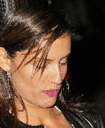

In [ ]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *
im = Image.open('/content/jessicali9530/celeba-dataset/versions/2/img_align_celeba/img_align_celeba/000004.jpg')
im.to_thumb(128,128)

In [1]:
!pip install mediapipe opencv

ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [2]:
pip install mediapipe opencv-python

  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible

In [3]:
!cd /content/jessicali9530/celeba-dataset/versions/2/

/bin/bash: line 1: cd: /content/jessicali9530/celeba-dataset/versions/2/: No such file or directory


In [4]:
pwd


'/content'

In [5]:
cd jessicali9530/celeba-dataset/versions/2/

[Errno 2] No such file or directory: 'jessicali9530/celeba-dataset/versions/2/'
/content


In [6]:
ls

sample_data/


In [7]:
cd ..

/


In [8]:
ls

bin@                        dev/     lib32@   NGC-DL-CONTAINER-LICENSE  root/  tmp/
boot/                       etc/     lib64@   opt/                      run/   tools/
content/                    home/    libx32@  proc/                     sbin@  usr/
cuda-keyring_1.1-1_all.deb  kaggle/  media/   python-apt/               srv/   var/
datalab/                    lib@     mnt/     python-apt.tar.xz*        sys/


In [9]:
!cd content

In [10]:
ls

bin@                        dev/     lib32@   NGC-DL-CONTAINER-LICENSE  root/  tmp/
boot/                       etc/     lib64@   opt/                      run/   tools/
content/                    home/    libx32@  proc/                     sbin@  usr/
cuda-keyring_1.1-1_all.deb  kaggle/  media/   python-apt/               srv/   var/
datalab/                    lib@     mnt/     python-apt.tar.xz*        sys/


In [11]:
cd /content

/content


In [12]:
ls


sample_data/


In [13]:
cd sample_data

/content/sample_data


In [14]:
ls

anscombe.json*               california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv                README.md*
